In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/energy-consumption-prediction/Energy_consumption.csv


assumed# Renewable energy production scope
This Python script is designed to predict the amount of renewable energy that can be produced based on occupancy and temperature data.
The code uses a dataset named Energy_consumption.csv from Kaggle's input folder.

In [2]:
job_data = pd.read_csv("/kaggle/input/energy-consumption-prediction/Energy_consumption.csv")
job_data

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [3]:
features = [
    'Occupancy','Temperature'
]
X = job_data[features]
y = job_data['RenewableEnergy']
X

,Occupancy,Temperature
0,5,25.139433
1,1,27.731651
2,2,28.704277
3,1,20.080469
4,9,23.097359
...,...,...
995,5,28.619382
996,4,23.836647
997,6,23.005340
998,3,25.138365


## Target variable
+ 'RenewableEnergy' is presumably the amount of renewable energy that could theoretically be generated given the occupancy and temperature.

## Features
The features being targeted in this script are 'Occupancy' and 'Temperature'. These are selected as inputs for the machine learning model because they are assumed to have a significant impact on the amount of renewable energy that can be produced.

+ 'Occupancy' likely refers to the number of people present in a certain location or building. 
+ 'Temperature' refers to the temperature of the building in degree Celsius

In [4]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,shuffle=True)

In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.fit(X_valid,y_valid)

RandomForestRegressor()

In [6]:
data = {
    'Occupancy': [1, 8, 2, 3, 1],
    'Temperature': [31.1, 12.3, 10.1, 7.243, 14.0]
}

# Create a DataFrame
X_test = pd.DataFrame(data)
X_test

,Occupancy,Temperature
0,1,31.100
1,8,12.300
2,2,10.100
3,3,7.243
4,1,14.000


In [7]:
y_pred = model.predict(X_test)
y_pred_final = y_pred.flatten().tolist()
y_pred_final

[17.622521923595503,
 22.8643114356957,
 13.190475788924589,
 12.113895674386159,
 13.605198030728545]

In [8]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Temperature, celsius': X_test['Temperature'],
    'Producable Renewable energy, KWh': y_pred_final,
})

# Print the DataFrame
print(df)

   Temperature, celsius  Producable Renewable energy, KWh
0                31.100                         17.622522
1                12.300                         22.864311
2                10.100                         13.190476
3                 7.243                         12.113896
4                14.000                         13.605198


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


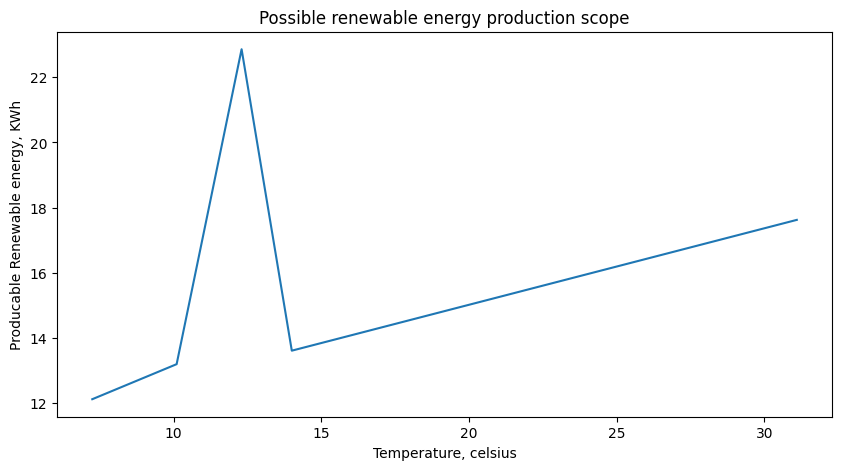

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Temperature, celsius", y="Producable Renewable energy, KWh")
plt.title('Possible renewable energy production scope')
plt.show()

# Analysis: It is predicted that
+ scope of production slowly increases till 10
+ rate increase till near 14 KWh, then starts decreasing
+ rate increases but not as fast as before at a steady rate 
+ rate keeps increasing as temperature increases

## Possible method that can help produce renewable energy
Heat Recovery Ventilation (HRV): HRV is an energy recovery ventilation system that works between two air sources at different temperatures. It recovers the residual heat in the exhaust gas, preheating the fresh air introduced into the air conditioning system 

### Sources:
+ https://en.wikipedia.org/wiki/Renewable_heat
+ https://www.carrier.com/residential/en/us/products/air-conditioners/how-do-air-conditioners-work/

## Thank you. 
This project was made by Ayush Dutta